In [ ]:
import pandas_datareader as pdr


In [ ]:
df=pdr.get_data_tiingo('AAPL',api_key='85fbe81c7467a2d430f0c7f9c9e6bffa1c87a1eb')

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("AAPL.csv")

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-01-12 00:00:00+00:00,119.25,119.30,118.21,118.895,27086220,28.058594,28.070359,27.813891,27.975066,108344880,0.0,1.0
1,AAPL,2017-01-13 00:00:00+00:00,119.04,119.62,118.81,119.110,26111948,28.009183,28.145653,27.955066,28.025654,104447792,0.0,1.0
2,AAPL,2017-01-17 00:00:00+00:00,120.00,120.24,118.22,118.340,34439843,28.235064,28.291534,27.816243,27.844479,137759372,0.0,1.0
3,AAPL,2017-01-18 00:00:00+00:00,119.99,120.50,119.71,120.000,23712961,28.232711,28.352710,28.166829,28.235064,94851844,0.0,1.0
4,AAPL,2017-01-19 00:00:00+00:00,119.78,120.09,119.37,119.400,25597291,28.183299,28.256240,28.086830,28.093888,102389164,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

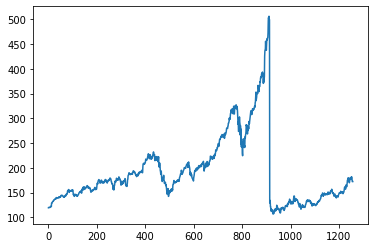

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data

array([[0.03108328],
       [0.03055729],
       [0.0329618 ],
       [0.03293676],
       [0.03241077],
       [0.0329618 ],
       [0.03316218],
       [0.03288666],
       [0.03767063],
       [0.03782091],
       [0.03784596],
       [0.03704446],
       [0.03634314],
       [0.0548779 ],
       [0.05432686],
       [0.05570445],
       [0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716],
       [0.07436443],
       [0.07469004],
       [0.07536631],
       [0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.086

In [ ]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX, dataY=[],[];
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a);
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY) 

In [ ]:
time_step=100
X_train, Y_train=create_dataset(train_data,time_step)
X_test, Y_test=create_dataset(test_data,time_step)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 336ms/step - loss: 0.0174 - val_loss: 0.0078
Epoch 2/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0039 - val_loss: 0.0171
Epoch 3/100
12/12 [==============================] - 2s 202ms/step - loss: 0.0016 - val_loss: 0.0137
Epoch 4/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0010 - val_loss: 0.0138
Epoch 5/100
12/12 [==============================] - 3s 212ms/step - loss: 9.6400e-04 - val_loss: 0.0117
Epoch 6/100
12/12 [==============================] - 2s 200ms/step - loss: 8.3913e-04 - val_loss: 0.0117
Epoch 7/100
12/12 [==============================] - 2s 205ms/step - loss: 7.7149e-04 - val_loss: 0.0119
Epoch 8/100
12/12 [==============================] - 2s 203ms/step - loss: 7.4167e-04 - val_loss: 0.0114
Epoch 9/100
12/12 [==============================] - 2s 210ms/step - loss: 6.9356e-04 - val_loss: 0.0098
Epoch 10/100
12/12 [==============================] - 2s 194ms/step - l

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

203.77497823500593

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

138.92307463453847

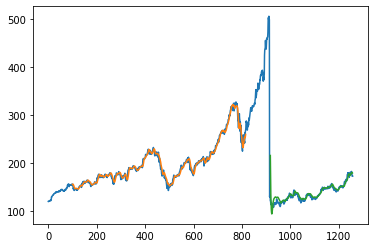

In [ ]:
look_back=100
trainPredictPlot= numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot= numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [ ]:
x_input=test_data[341:].reshape(1,-1)


In [ ]:
temp_input=list(x_input)


In [ ]:
from numpy import array
lst_output=[]
i=0
n_steps=100
while(i<30):
  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print("{} day input {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input=x_input.reshape((1,n_steps,1))
    yhat=model.predict(x_input,verbose=0)
    print(yhat)
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))

print(lst_output)      

0 day input [0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735 0.17279735
 0.17279735 0.17279735 0.17279735 0.17279735 0.17431942 0.1744706
 0.17475426 0.1751229  0.17553659 0.17597063 0.17641188 0.17685464
 0.17729659 0.17773716 0.17817621 0.17861378 0.17905003 0.17948499
 0.17991897 0.18035185 0.18078396 0.18121524 0.1816

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(day_new,scaler.inverse_transform(df1[1128:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

NameError: ignored

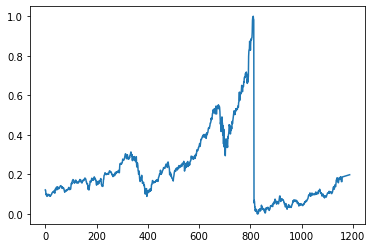

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[100:])